In [81]:
import pandas as pd
import numpy as np
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import MinMaxScaler

In [137]:
dados = pd.read_csv("dados_pre_processados.csv")
dados.drop("Unnamed: 0", axis=1, inplace=True)
dados.head()

,CodigoReceita,RelacaoAguaCimento Emitida,TipoLancamento,QuantidadeAgua,ConsumoTotal,Idade,TipoTraco,CodigoAglomerante,FCK,RelacaoAguaCimento Receita,Rompimento7Dias,Rompimento28Dias,CodigoCimento,CodigoFornecedorCimento,ResultadoEsperado,ResultadoProjetado,DiferencaRealProjetado
0,11051,1.011,C,930,2124.0,28,N,3051.0,15.0,0.9,10.50,18.37,13,205841,23.266913,18.868387,0.027130
1,11051,1.011,C,1240,2832.0,28,N,3051.0,15.0,0.9,11.69,19.55,13,205841,23.266913,20.723169,0.060009
2,11051,1.011,C,1240,2832.0,28,N,3051.0,15.0,0.9,10.16,16.73,13,205841,23.266913,18.332992,0.095815
3,11051,1.011,C,1240,2832.0,28,N,3051.0,15.0,0.9,13.52,17.19,13,205841,23.266913,23.522874,0.368405
4,11051,1.011,C,1240,2832.0,28,N,3051.0,15.0,0.9,7.71,13.52,13,205841,23.266913,14.392958,0.064568


In [138]:
dados_por_aglomerante = dados.groupby("CodigoAglomerante")

In [139]:
dados_aglomerante = dados_por_aglomerante.get_group(25051.0)

In [140]:
fig = px.box(dados_aglomerante, x="TipoLancamento", y="Rompimento28Dias", title='Influência do Tipo de Lançamento no Resultado')
fig.show()

In [141]:
fig = px.box(dados_aglomerante, x="TipoTraco", y="Rompimento28Dias", title='Influência do Tipo de Traço no Resultado')
fig.show()

In [142]:
fig = px.box(dados_aglomerante, x="CodigoFornecedorCimento", y="Rompimento28Dias", title='Influência do Fornecedor do Cimento no Resultado')
fig.show()

In [143]:
fig = px.box(dados_aglomerante, y="RelacaoAguaCimento Emitida")
fig.show()

In [144]:
fig = px.box(dados_aglomerante, y="QuantidadeAgua")
fig.show()

In [145]:
fig = px.box(dados_aglomerante, y="ConsumoTotal")
fig.show()

In [146]:
fig = px.box(dados_aglomerante, y="Rompimento7Dias")
fig.show()

In [147]:
fig = px.scatter(dados_aglomerante, x="Rompimento7Dias", y="Rompimento28Dias")
fig.show()

In [148]:
fig = px.scatter(dados_aglomerante, x="RelacaoAguaCimento Emitida", y="Rompimento28Dias")
fig.show()

In [149]:
fig = px.scatter(dados_aglomerante, x="QuantidadeAgua", y="Rompimento28Dias")
fig.show()

In [150]:
fig = px.scatter(dados_aglomerante, x="ConsumoTotal", y="Rompimento28Dias")
fig.show()

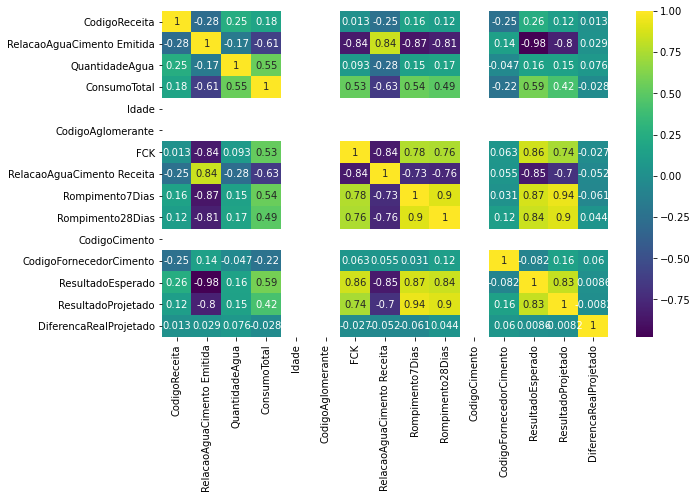

In [152]:
features_numericas = dados_aglomerante.select_dtypes(include=['int', 'float'])

k = features_numericas.shape[1] #number of variables for heatmap
cols = dados_aglomerante.corr().index
cm = dados_aglomerante[cols].corr()
plt.figure(figsize=(10,6))
sns.heatmap(cm, annot=True, cmap = 'viridis')

In [153]:
dados_aglomerante.head()

,CodigoReceita,RelacaoAguaCimento Emitida,TipoLancamento,QuantidadeAgua,ConsumoTotal,Idade,TipoTraco,CodigoAglomerante,FCK,RelacaoAguaCimento Receita,Rompimento7Dias,Rompimento28Dias,CodigoCimento,CodigoFornecedorCimento,ResultadoEsperado,ResultadoProjetado,DiferencaRealProjetado
37920,5002051,0.694,B,1330,4214.0,28,N,25051.0,30.0,0.576,22.07,36.93,16,205841,35.430381,31.164097,0.156131
37921,5002051,0.694,B,1140,3612.0,28,N,25051.0,30.0,0.576,19.87,35.85,16,205841,35.430381,28.652019,0.200781
37922,5002051,0.694,B,1288,2128.0,28,N,25051.0,30.0,0.576,24.37,37.49,16,205841,35.430381,37.510197,0.000539
37923,5002051,0.676,B,1480,4944.0,28,N,25051.0,30.0,0.576,21.56,29.33,16,205841,36.591460,33.779368,0.151700
37924,5002051,0.676,B,1480,4944.0,28,N,25051.0,30.0,0.576,23.51,34.10,16,205841,36.591460,36.376534,0.066761


In [154]:
dados_aglomerante["CodigoFornecedorCimento"].value_counts()

205841    3246
203226    2069
Name: CodigoFornecedorCimento, dtype: int64

In [155]:
dados_aglomerante["TipoLancamento"].replace('C', 0, inplace = True)
dados_aglomerante["TipoLancamento"].replace('B', 1, inplace = True)

dados_aglomerante["TipoTraco"].replace('N', 0, inplace = True)
dados_aglomerante["TipoTraco"].replace('E', 1, inplace = True)

dados_aglomerante["CodigoCimento"].replace(13, 1, inplace = True)

dados_aglomerante["CodigoFornecedorCimento"].replace(206605, 0, inplace = True)
dados_aglomerante["CodigoFornecedorCimento"].replace(205841, 1, inplace = True)

dados_aglomerante.columns = ['CodigoReceita', 'RelacaoAguaCimento Emitida', 'EhLancamentoBombeavel',
       'QuantidadeAgua', 'ConsumoTotal', 'Idade', 'EhTracoEspecial',
       'CodigoAglomerante', 'FCK', 'RelacaoAguaCimento Receita',
       'Rompimento7Dias', 'Rompimento28Dias', 'CodigoCimento',
       'CodigoFornecedorCimento', 'ResultadoEsperado', 'ResultadoProjetado',
       'DiferencaRealProjetado']

/home/marina/anaconda3/lib/python3.8/site-packages/pandas/core/generic.py:6746: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [156]:
scaler = MinMaxScaler()
dados_aglomerante["RelacaoAguaCimento Emitida"] = scaler.fit_transform(dados_aglomerante["RelacaoAguaCimento Emitida"].values.reshape(-1, 1))
dados_aglomerante["QuantidadeAgua"] = scaler.fit_transform(dados_aglomerante["QuantidadeAgua"].values.reshape(-1, 1))
dados_aglomerante["ConsumoTotal"] = scaler.fit_transform(dados_aglomerante["ConsumoTotal"].values.reshape(-1, 1))
dados_aglomerante["FCK"] = scaler.fit_transform(dados_aglomerante["FCK"].values.reshape(-1, 1))
dados_aglomerante["RelacaoAguaCimento Receita"] = scaler.fit_transform(dados_aglomerante["RelacaoAguaCimento Receita"].values.reshape(-1, 1))

dados_aglomerante["Rompimento7DiasLog"] = np.log(dados_aglomerante["Rompimento7Dias"])
dados_aglomerante["Rompimento7DiasLog"] = scaler.fit_transform(dados_aglomerante["Rompimento7DiasLog"].values.reshape(-1, 1))

dados_aglomerante["Rompimento28DiasLog"] = np.log(dados_aglomerante["Rompimento28Dias"])
dados_aglomerante["Rompimento28DiasLog"] = scaler.fit_transform(dados_aglomerante["Rompimento28DiasLog"].values.reshape(-1, 1))

dados_aglomerante.head()

<ipython-input-156-90398cc0f47d>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-156-90398cc0f47d>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-156-90398cc0f47d>:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-156-903

,CodigoReceita,RelacaoAguaCimento Emitida,EhLancamentoBombeavel,QuantidadeAgua,ConsumoTotal,Idade,EhTracoEspecial,CodigoAglomerante,FCK,RelacaoAguaCimento Receita,Rompimento7Dias,Rompimento28Dias,CodigoCimento,CodigoFornecedorCimento,ResultadoEsperado,ResultadoProjetado,DiferencaRealProjetado,Rompimento7DiasLog,Rompimento28DiasLog
37920,5002051,0.431438,1,0.646204,0.521277,28,0,25051.0,0.5,0.391608,22.07,36.93,16,1,35.430381,31.164097,0.156131,0.709097,0.580827
37921,5002051,0.431438,1,0.492730,0.424242,28,0,25051.0,0.5,0.391608,19.87,35.85,16,1,35.430381,28.652019,0.200781,0.666707,0.561805
37922,5002051,0.431438,1,0.612278,0.185042,28,0,25051.0,0.5,0.391608,24.37,37.49,16,1,35.430381,37.510197,0.000539,0.749115,0.590472
37923,5002051,0.401338,1,0.767367,0.638943,28,0,25051.0,0.5,0.391608,21.56,29.33,16,1,36.591460,33.779368,0.151700,0.699659,0.433164
37924,5002051,0.401338,1,0.767367,0.638943,28,0,25051.0,0.5,0.391608,23.51,34.10,16,1,36.591460,36.376534,0.066761,0.734612,0.529733


In [158]:
X = dados_aglomerante.drop(["CodigoReceita", "CodigoAglomerante", "Idade", "RelacaoAguaCimento Emitida", "QuantidadeAgua", "ConsumoTotal", "Rompimento7Dias", "Rompimento28Dias", "Rompimento28DiasLog", "ResultadoEsperado", "ResultadoProjetado", "DiferencaRealProjetado"], axis=1)
Y = dados_aglomerante["Rompimento28DiasLog"]

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state = 3)

In [159]:
indices_x_test = x_test.index

In [160]:
X.columns

Index(['EhLancamentoBombeavel', 'EhTracoEspecial', 'FCK',
       'RelacaoAguaCimento Receita', 'CodigoCimento',
       'CodigoFornecedorCimento', 'Rompimento7DiasLog'],
      dtype='object')

In [161]:
modelo = sm.OLS(y_train, x_train)
result = modelo.fit()

print(result.summary(yname='Rompimento28Dias', xname=['EhLancamentoBombeavel', 'EhTracoEspecial', 'FCK',
       'RelacaoAguaCimento Receita', 'CodigoCimento',
       'CodigoFornecedorCimento', 'Rompimento7DiasLog']))

                            OLS Regression Results                            
Dep. Variable:       Rompimento28Dias   R-squared:                       0.854
Model:                            OLS   Adj. R-squared:                  0.853
Method:                 Least Squares   F-statistic:                     3610.
Date:                Sun, 04 Oct 2020   Prob (F-statistic):               0.00
Time:                        17:59:36   Log-Likelihood:                 5428.8
No. Observations:                3720   AIC:                        -1.084e+04
Df Residuals:                    3713   BIC:                        -1.080e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
EhLancamentoBombeave

In [162]:
modelo_skl = LinearRegression().fit(x_train, y_train)
modelo_skl.score(x_train, y_train)

y_pred = modelo_skl.predict(x_test)

mean_squared_error(y_test, y_pred)
r2_score(y_test, y_pred)

0.8482242779740437

In [163]:
mask_dados_teste = dados_aglomerante.index.isin(indices_x_test)

dados_teste = dados_aglomerante[mask_dados_teste]
dados_teste.head()

,CodigoReceita,RelacaoAguaCimento Emitida,EhLancamentoBombeavel,QuantidadeAgua,ConsumoTotal,Idade,EhTracoEspecial,CodigoAglomerante,FCK,RelacaoAguaCimento Receita,Rompimento7Dias,Rompimento28Dias,CodigoCimento,CodigoFornecedorCimento,ResultadoEsperado,ResultadoProjetado,DiferencaRealProjetado,Rompimento7DiasLog,Rompimento28DiasLog
37926,5002051,0.401338,1,0.468498,0.439716,28,0,25051.0,0.5,0.391608,25.55,35.21,16,1,36.59146,39.054621,0.109191,0.768203,0.550261
37928,5002051,0.401338,1,0.767367,0.672469,28,0,25051.0,0.5,0.391608,20.46,35.53,16,1,36.59146,32.297007,0.090993,0.678519,0.556059
37929,5002051,0.401338,1,0.767367,0.672469,28,0,25051.0,0.5,0.391608,18.60,24.10,16,1,36.59146,29.759789,0.234846,0.640045,0.307299
37935,5002051,0.401338,1,0.693053,0.567376,28,0,25051.0,0.5,0.391608,25.70,47.93,16,1,36.59146,42.647596,0.110211,0.770566,0.747910
37937,5002051,0.401338,1,0.205170,0.228885,28,0,25051.0,0.5,0.391608,21.46,36.59,16,1,36.59146,35.172279,0.038746,0.697782,0.574899


In [164]:
comparativos = pd.DataFrame()

comparativos["ResultadoProjetado"] = dados_teste["ResultadoProjetado"]
comparativos["Rompimento28Dias"] = dados_teste["Rompimento28Dias"]

comparativos.head()

,ResultadoProjetado,Rompimento28Dias
37926,39.054621,35.21
37928,32.297007,35.53
37929,29.759789,24.10
37935,42.647596,47.93
37937,35.172279,36.59


In [165]:
comparativos["ProjetadoPeloModeloRegLin"] = result.predict(dados_teste.drop(["CodigoReceita", "CodigoAglomerante", "Idade", "RelacaoAguaCimento Emitida", "QuantidadeAgua", "ConsumoTotal", "Rompimento7Dias", "Rompimento28Dias", "Rompimento28DiasLog", "ResultadoEsperado", "ResultadoProjetado", "DiferencaRealProjetado"], axis=1))

In [166]:
comparativos["ProjetadoPeloModeloRegLin"] = scaler.inverse_transform(comparativos["ProjetadoPeloModeloRegLin"].values.reshape(-1, 1))
comparativos["ProjetadoPeloModeloRegLin"] = np.exp(comparativos["ProjetadoPeloModeloRegLin"])

comparativos.head()

,ResultadoProjetado,Rompimento28Dias,ProjetadoPeloModeloRegLin
37926,39.054621,35.21,38.985780
37928,32.297007,35.53,34.800598
37929,29.759789,24.10,33.145790
37935,42.647596,47.93,39.102606
37937,35.172279,36.59,35.659894


In [167]:
def EncontraProjecaoMaisProxima(row):
    erro_projetado_curva = np.abs(row["Rompimento28Dias"] - row["ResultadoProjetado"])
    erro_projetado_modelo = np.abs(row["Rompimento28Dias"] - row["ProjetadoPeloModeloRegLin"])
    
    if (erro_projetado_curva <= erro_projetado_modelo):
        return 'Curva'
    else:
        return 'Modelo'

In [168]:
comparativos["ProjecaoMaisAproximada"] = comparativos.apply(EncontraProjecaoMaisProxima, axis = "columns")

In [169]:
comparativos["ProjecaoMaisAproximada"].value_counts()

Modelo    845
Curva     750
Name: ProjecaoMaisAproximada, dtype: int64

Modelo: 1291 |
Curva: 919

In [170]:
svmModel = svm.SVR(kernel='poly')
svmModel.fit(x_train, y_train)

SVR(kernel='poly')

In [171]:
svmModel.predict(x_test)

array([0.51577751, 0.51577751, 0.51577751, ..., 0.51577751, 0.51577751,
       0.51577751])

In [66]:
comparativos["ProjetadoPeloModeloSVM"] = svmModel.predict(dados_teste.drop(["CodigoReceita", "CodigoAglomerante", "Idade", "Rompimento7Dias", "Rompimento28Dias", "Rompimento28DiasLog", "ResultadoEsperado", "ResultadoProjetado", "DiferencaRealProjetado"], axis=1))

comparativos["ProjetadoPeloModeloSVM"] = scaler.inverse_transform(comparativos["ProjetadoPeloModeloSVM"].values.reshape(-1, 1))
comparativos["ProjetadoPeloModeloSVM"] = np.exp(comparativos["ProjetadoPeloModeloSVM"])

comparativos.head()

,ResultadoProjetado,Rompimento28Dias,ProjetadoPeloModeloRegLin,ProjecaoMaisAproximada,ProjetadoPeloModeloSVM
37926,39.054621,35.21,39.535967,Curva,33.365475
37928,32.297007,35.53,34.359689,Modelo,33.365475
37929,29.759789,24.10,32.594079,Curva,33.365475
37935,42.647596,47.93,39.250048,Curva,33.365475
37937,35.172279,36.59,36.461686,Modelo,33.365475


In [67]:
def EncontraProjecaoMaisProxima(row):
    erro_projetado_curva = np.abs(row["Rompimento28Dias"] - row["ResultadoProjetado"])
    erro_projetado_modelo = np.abs(row["Rompimento28Dias"] - row["ProjetadoPeloModeloSVM"])
    
    if (erro_projetado_curva <= erro_projetado_modelo):
        return 'Curva'
    else:
        return 'Modelo'

In [68]:
comparativos["ProjecaoMaisAproximadaSVM"] = comparativos.apply(EncontraProjecaoMaisProxima, axis = "columns")

In [69]:
comparativos["ProjecaoMaisAproximadaSVM"].value_counts()

Curva     1211
Modelo     384
Name: ProjecaoMaisAproximadaSVM, dtype: int64

In [35]:
mean_squared_error(comparativos["Rompimento28Dias"].values, comparativos["ResultadoProjetado"].values)

12.738820734970254

In [36]:
mean_squared_error(comparativos["Rompimento28Dias"].values, comparativos["ProjetadoPeloModeloRegLin"].values)

9.660618671963544

In [37]:
mean_squared_error(comparativos["Rompimento28Dias"].values, comparativos["ProjetadoPeloModeloSVM"].values)

60.66858294212125